In [1]:
library('ISLR')
data(Carseats)

Warning message:
"package 'ISLR' was built under R version 4.0.4"


In [2]:
head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [3]:
library('rpart')

In [4]:
?rpart

rpart {rpart},R Documentation
formula,"a formula, with a response but no interaction terms. If this a a data frame, that is taken as the model frame (see model.frame)."
data,an optional data frame in which to interpret the variables named in the formula.
weights,optional case weights.
subset,optional expression saying that only a subset of the rows of the data should be used in the fit.
na.action,"the default action deletes all observations for which y is missing, but keeps those in which one or more predictors are missing."
method,"one of ""anova"", ""poisson"", ""class"" or ""exp"". If method is missing then the routine tries to make an intelligent guess. If y is a survival object, then method = ""exp"" is assumed, if y has 2 columns then method = ""poisson"" is assumed, if y is a factor then method = ""class"" is assumed, otherwise method = ""anova"" is assumed. It is wisest to specify the method directly, especially as more criteria may added to the function in future. Alternatively, method can be a list of functions named init, split and eval. Examples are given in the file ‘tests/usersplits.R’ in the sources, and in the vignettes ‘User Written Split Functions’."
model,"if logical: keep a copy of the model frame in the result? If the input value for model is a model frame (likely from an earlier call to the rpart function), then this frame is used rather than constructing new data."
x,keep a copy of the x matrix in the result.
y,keep a copy of the dependent variable in the result. If missing and model is supplied this defaults to FALSE.
parms,"optional parameters for the splitting function. Anova splitting has no parameters. Poisson splitting has a single parameter, the coefficient of variation of the prior distribution on the rates. The default value is 1. Exponential splitting has the same parameter as Poisson. For classification splitting, the list can contain any of: the vector of prior probabilities (component prior), the loss matrix (component loss) or the splitting index (component split). The priors must be positive and sum to 1. The loss matrix must have zeros on the diagonal and positive off-diagonal elements. The splitting index can be gini or information. The default priors are proportional to the data counts, the losses default to 1, and the split defaults to gini."


In [5]:
set.seed(128321093)
ss_train = sample(1:nrow(Carseats),floor(nrow(Carseats)/2))
dim(Carseats)
length(ss_train)

[1] 400  11

[1] 200

In [6]:
train = Carseats[ss_train,]
validation = Carseats[-ss_train,]

In [7]:
dim(train)
dim(validation)

[1] 200  11

[1] 200  11

In [8]:
model = rpart(Sales~.,data=train,method="anova",
    control = rpart.control(maxdepth=30,minsplit=2,xval=10))

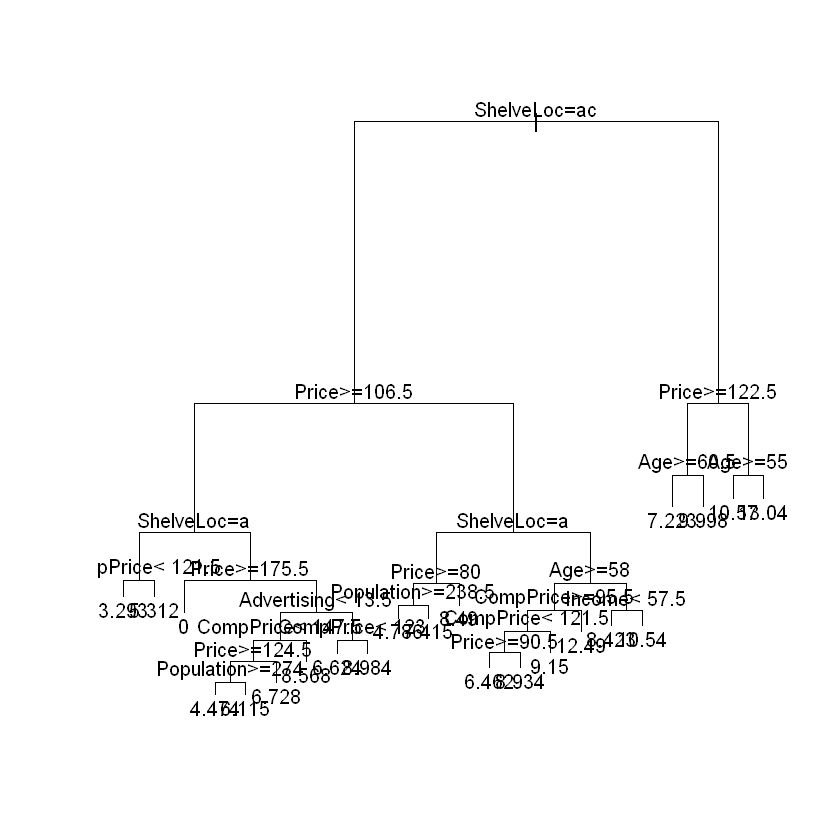

In [9]:
plot(model)
text(model)

In [10]:
ct = model$cptable
ct

,CP,nsplit,rel error,xerror,xstd
1,0.24582911,0,1.0000000,1.0045802,0.09590597
2,0.11255534,1,0.7541709,0.7677671,0.07458388
3,0.06269736,2,0.6416156,0.7574366,0.07341965
4,0.04484188,3,0.5789182,0.7233356,0.06661442
5,0.04175615,4,0.5340763,0.7064891,0.06152094
6,0.02841973,5,0.4923202,0.6730576,0.05878422
7,0.02708010,6,0.4639004,0.6517382,0.05880444
8,0.02391079,7,0.4368203,0.6397726,0.05829707
9,0.02327041,8,0.4129095,0.6326286,0.05793195
10,0.02048612,9,0.3896391,0.6344926,0.05769205


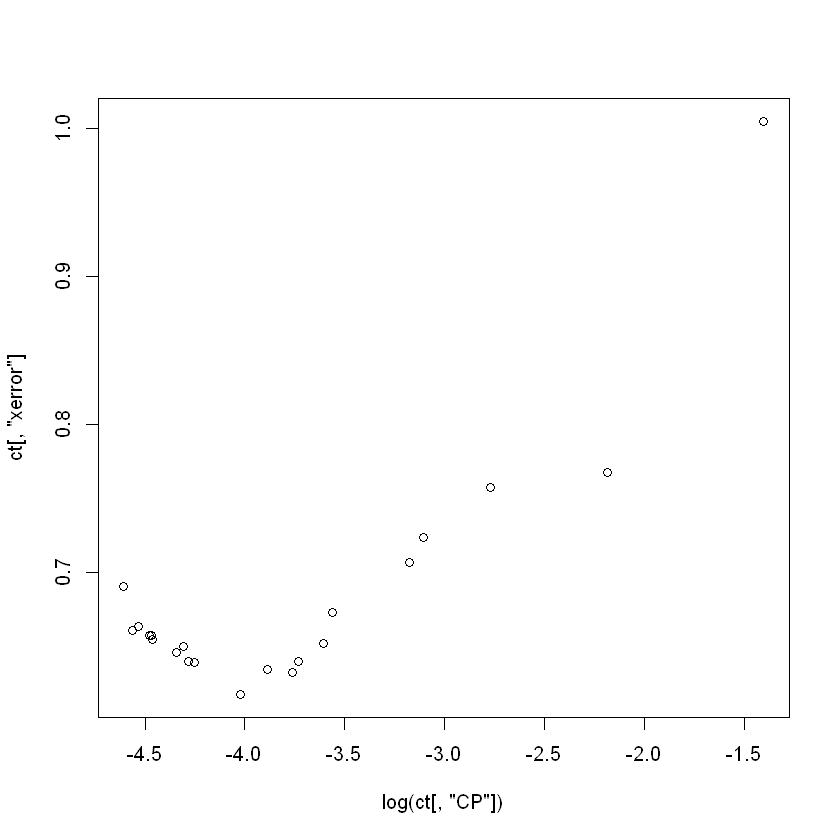

In [11]:
plot(log(ct[,"CP"]),ct[,"xerror"])

In [12]:
opt_alpha = ct[which.min(ct[,"xerror"]),"CP"]
opt_alpha

[1] 0.01794398

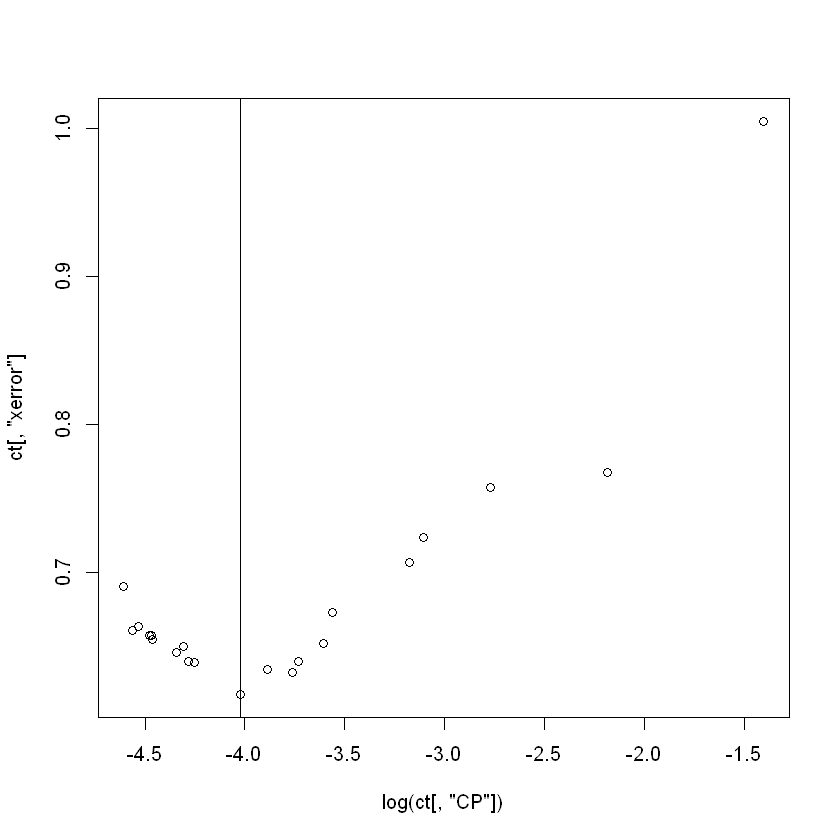

In [13]:
plot(log(ct[,"CP"]),ct[,"xerror"])
abline(v=log(opt_alpha))

In [14]:
pruned = prune(model,cp=opt_alpha)

In [15]:
pruned

n= 200 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 200 1551.45300  7.567600  
   2) ShelveLoc=Bad,Medium 157  893.07850  6.844904  
     4) Price>=106.5 101  429.31740  6.059604  
       8) ShelveLoc=Bad 31   92.25174  4.856129 *
       9) ShelveLoc=Medium 70  272.28290  6.592571  
        18) Price>=175.5 1    0.00000  0.000000 *
        19) Price< 175.5 69  228.19110  6.688116  
          38) Advertising< 13.5 55  148.11040  6.318182 *
          39) Advertising>=13.5 14   42.98417  8.141429 *
     5) Price< 106.5 56  289.13680  8.261250  
      10) ShelveLoc=Bad 14   57.63089  6.330714 *
      11) ShelveLoc=Medium 42  161.93580  8.904762  
        22) Age>=58 21   75.07958  7.977619 *
        23) Age< 58 21   50.75332  9.831905 *
   3) ShelveLoc=Good 43  276.98220 10.206280  
     6) Price>=122.5 22  103.94610  8.736818  
      12) Age>=60.5 10   33.24041  7.223000 *
      13) Age< 60.5 12   28.69217  9.998333 *
     7) Price< 122.5 21   75.76411 11.7457

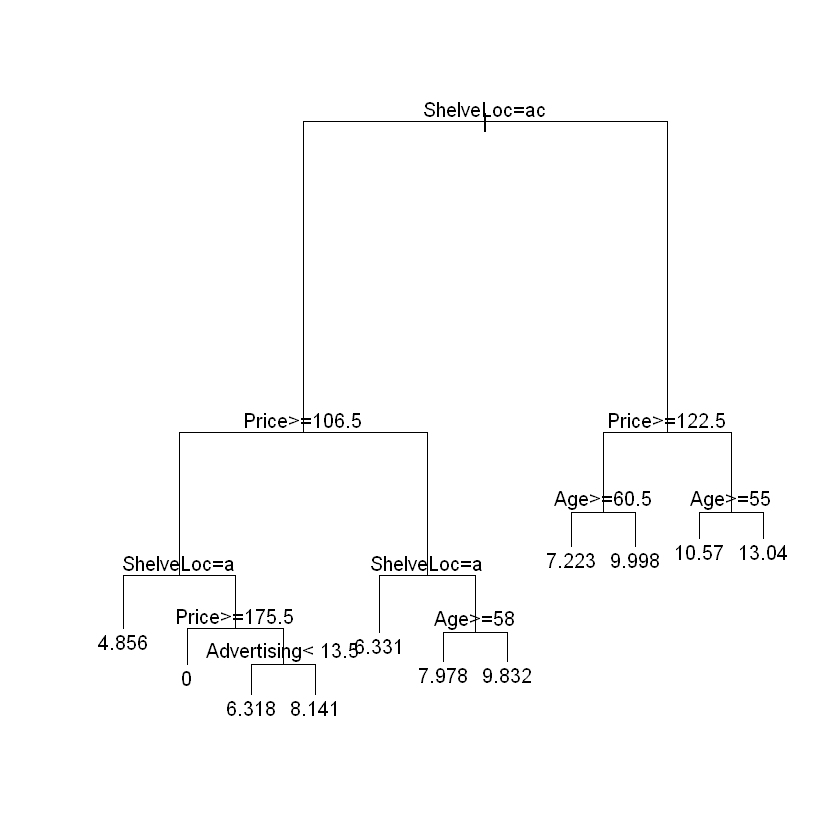

In [16]:
plot(pruned)
text(pruned)

In [17]:
RSS_train_full = sum((predict(model,train)-train$Sales)^2)
RSS_train_pruned = sum((predict(pruned,train)-train$Sales)^2)
RSS_train_full
RSS_train_pruned

[1] 357.5552

[1] 572.7236

In [18]:
RSS_val_full = sum((predict(model,validation)-train$Sales)^2)
RSS_val_pruned = sum((predict(pruned,validation)-train$Sales)^2)
RSS_val_full
RSS_val_pruned

[1] 2758.731

[1] 2659.221

### Classification

In [19]:
library('MASS')

In [20]:
library('palmerpenguins')

In [21]:
penguins = penguins[complete.cases(penguins),]

In [22]:
classmod = rpart(species~.,data=penguins,method="class")

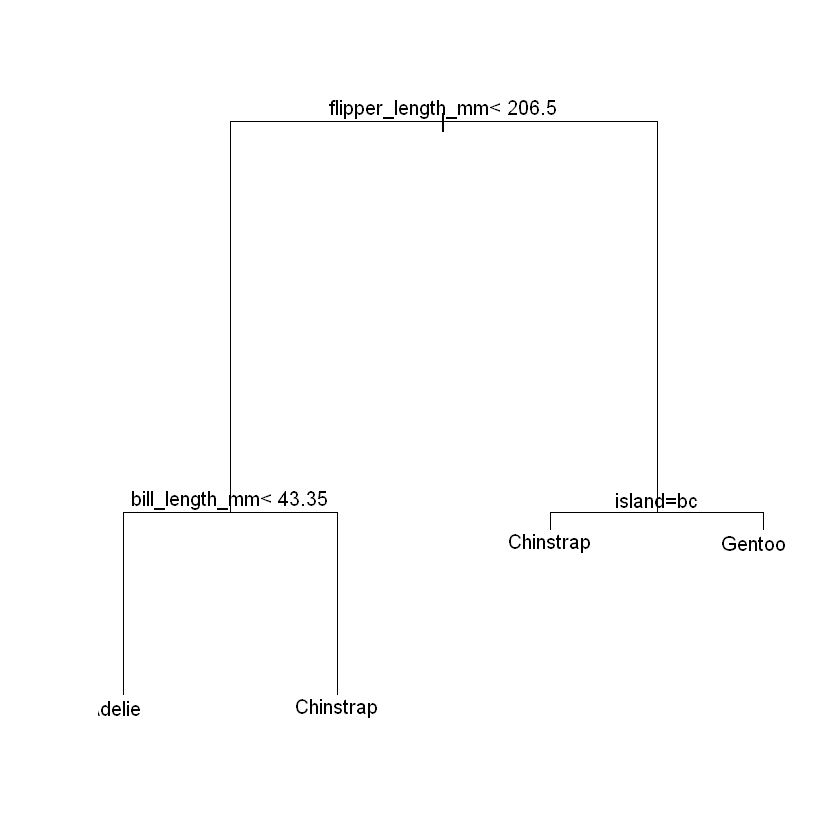

In [23]:
plot(classmod)
text(classmod)

In [24]:
library('ggplot2')

In [25]:
plot_fit = function(v1,v2,df=penguins,N=floor(sqrt(10000)),scaleit=FALSE,fmla='species~.',cp=0){
    train_df = df[,c('species',v1,v2)]
    if(scaleit)
        train_df[,c(v1,v2)] = scale(train_df[,c(v1,v2)])
    
    # fit model
    mod = rpart(formula=as.formula(fmla),data=train_df,method="class",
                   control = rpart.control(maxdepth=30,minsplit=1,minbucket=1,cp=cp))
    
    r1 = range(train_df[[v1]])
    r2 = range(train_df[[v2]])
    
    s1 = seq(r1[1],r1[2],length.out=N)
    s2 = seq(r2[1],r2[2],length.out=N)
    
    p_df = expand.grid(v1=s1,v2=s2)
    colnames(p_df) = c(v1,v2)
    preds = predict(mod,newdata=p_df,type='class')
    
    p_df$species = preds
    
    ggplot(data=p_df,mapping=aes_string(x=v1,y=v2,fill='species',shape='species'))+geom_tile()+
        geom_point(data=train_df,size=5)
}

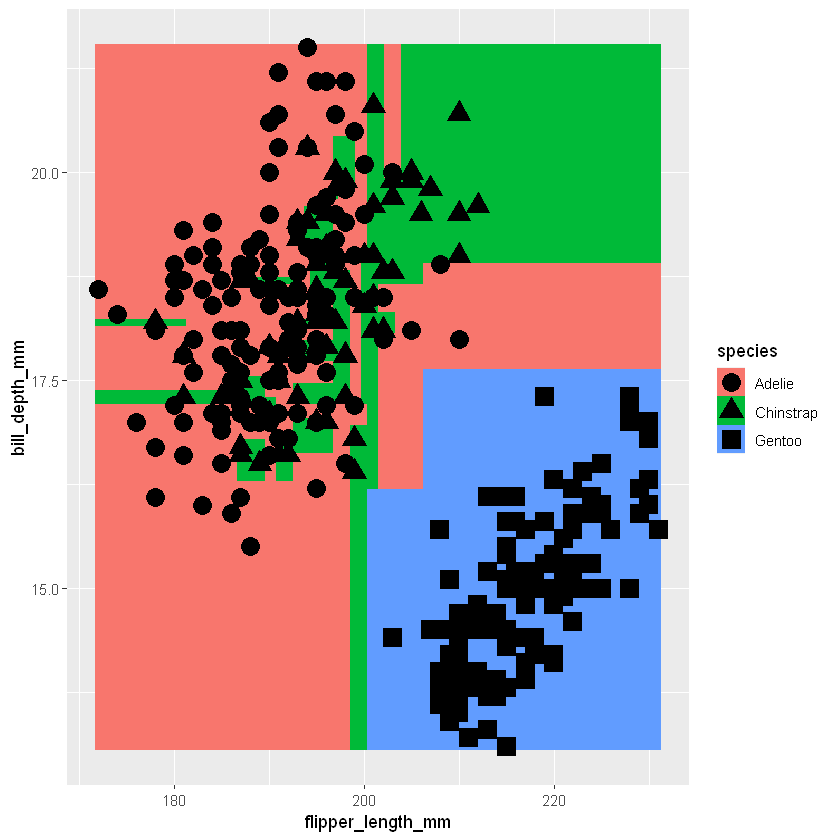

In [26]:
plot_fit(v1='flipper_length_mm',v2='bill_depth_mm',cp=0)

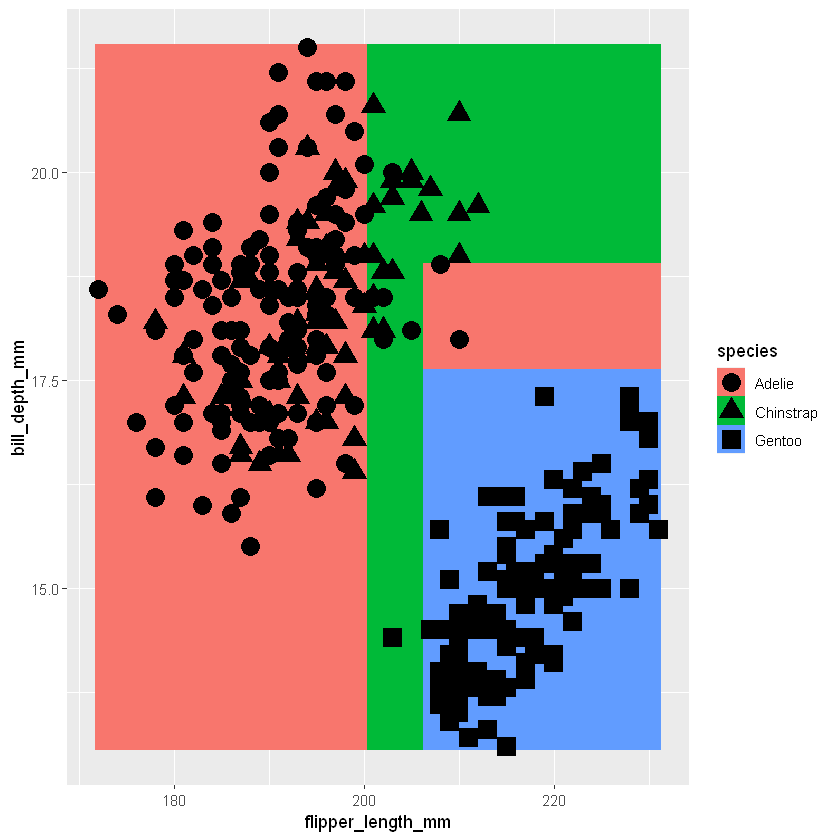

In [27]:
plot_fit(v1='flipper_length_mm',v2='bill_depth_mm',cp=.01)

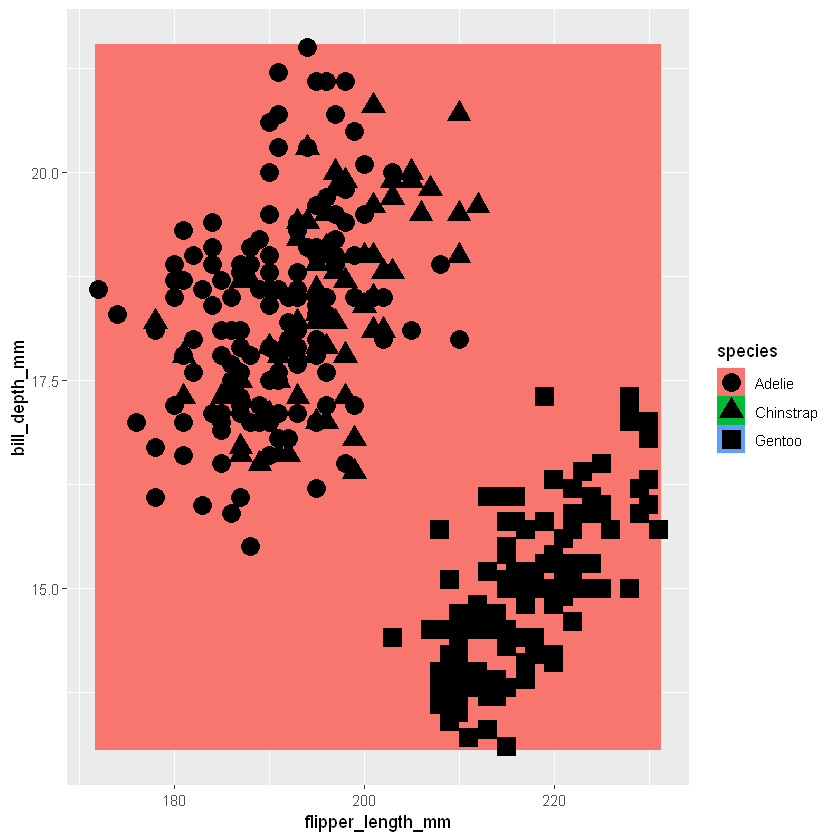

In [28]:
plot_fit(v1='flipper_length_mm',v2='bill_depth_mm',cp=1)